In [67]:
from nam.wrapper import NAMClassifier
import sklearn.metrics as sk_metrics
import pandas as pd
import numpy as np

# NAMs on IRIS Dataset

In [68]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Create a binary problem
iris['species'] = np.where(iris['species'] == 'Iris-setosa', 1, 0)

X = iris.drop('species', axis=1)
y = iris['species']

# Normalize between -1 and 1 with sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = NAMClassifier(
            num_epochs=20,
            num_learners=1,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 0.714 |
Epoch(0):           Validation Loss: 0.597 | ACCURACY: 0.314:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 0.714 |
Epoch(1):           Validation Loss: 0.597 | ACCURACY: 0.314:   5%|▌         | 1/20 [00:00<00:02,  6.99it/s]
                    Training Loss: 0.600 |
Epoch(2):           Validation Loss: 0.467 | ACCURACY: 0.029:   5%|▌         | 1/20 [00:00<00:02,  6.99it/s]
                    Training Loss: 0.481 |
Epoch(3):           Validation Loss: 0.328 | ACCURACY: 0.127:   5%|▌         | 1/20 [00:00<00:02,  6.99it/s]
                    Training Loss: 0.351 |
Epoch(4):           Validation Loss: 0.273 | ACCURACY: 0.284:   5%|▌         | 1/20 [00:00<00:02,  6.99it/s]
                    Training Loss: 0.301 |
Epoch(4):           Validation Loss: 0.283 | ACCURACY: 0.324:   5%|▌         | 1/20 [00:00<00:02,  6.99it/s]
                    Training Loss: 0.301 |
Epoch(5):     

In [70]:
model.predict(X_test).squeeze()

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.])

In [71]:
(model.predict(X_test).squeeze() == y_test).sum() / len(y_test)

1.0

In [76]:
model.num_inputs

4

In [75]:
model.plot(1)

IndexError: index 1 is out of bounds for dimension 2 with size 1

In [63]:
x0 = model.plot(0)['x']
y0 = model.plot(0)['y'][:, 0]

x1 = model.plot(1)['x']
y1 = model.plot(1)['y'][:, 1]

x2 = model.plot(2)['x']
y2 = model.plot(2)['y'][:, 2]

x3 = model.plot(3)['x']
y3 = model.plot(3)['y'][:, 3]

import matplotlib.pyplot as plt

plt.plot(x0, y0, label=iris.columns[0])
plt.plot(x1, y1, label=iris.columns[1])
plt.plot(x2, y2, label=iris.columns[2])
plt.plot(x3, y3, label=iris.columns[3])
plt.show()

IndexError: index 1 is out of bounds for dimension 2 with size 1

## NAMs on Diabetes Dataset

In [36]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [37]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=5,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:03, 14.00it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:03, 14.00it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:03, 14.00it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   4%|▍         | 2/50 [00:00<00:03, 14.00it/s]
                    Training Loss: 1.482 |
Epoch(5):         

In [38]:
pred = model.predict(X_test).squeeze()

In [39]:
(pred == y_test).sum() / len(y_test)

0.7207792207792207

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:05,  9.35it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   6%|▌         | 3/50 [00:00<00:03, 14.33it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   6%|▌         | 3/50 [00:00<00:03, 14.33it/s]
                    Training Loss: 0.808 |
Epoch(5)

n_learners: 1, n_epochs: 50, accuracy: 0.7337662337662337


Epoch(0):      | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(1):           Validation Loss: 2.220 | ACCURACY: 0.000:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   3%|▎         | 2/60 [00:00<00:04, 12.86it/s]
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   3%|▎         | 2/60 [00:00<00:04, 12.86it/s]  
                    Training Loss: 1.003 |
Epoch(3):           Validation Loss: 0.761 | ACCURACY: 0.334:   3%|▎         | 2/60 [00:00<00:04, 12.86it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   7%|▋         | 4/60 [00:00<00:03, 14.01it/s]
                    Training Loss: 0.808 |
Epoch(5):      

n_learners: 1, n_epochs: 60, accuracy: 0.7272727272727273


Epoch(0):      | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/65 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(1):           Validation Loss: 2.220 | ACCURACY: 0.000:   0%|          | 0/65 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   3%|▎         | 2/65 [00:00<00:04, 14.86it/s]
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   3%|▎         | 2/65 [00:00<00:04, 14.86it/s]  
                    Training Loss: 1.003 |
Epoch(3):           Validation Loss: 0.761 | ACCURACY: 0.334:   3%|▎         | 2/65 [00:00<00:04, 14.86it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   6%|▌         | 4/65 [00:00<00:03, 15.70it/s]
                    Training Loss: 0.808 |
Epoch(5):      

n_learners: 1, n_epochs: 65, accuracy: 0.3246753246753247


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(1):           Validation Loss: 2.220 | ACCURACY: 0.000:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   3%|▎         | 2/70 [00:00<00:04, 14.10it/s]
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   3%|▎         | 2/70 [00:00<00:04, 14.10it/s]  
                    Training Loss: 1.003 |
Epoch(3):           Validation Loss: 0.761 | ACCURACY: 0.334:   3%|▎         | 2/70 [00:00<00:04, 14.10it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   6%|▌         | 4/70 [00:00<00:05, 13.10it/s]
                    Training Loss: 0.808 |
Epoch(5):      

n_learners: 1, n_epochs: 70, accuracy: 0.3246753246753247


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(1):           Validation Loss: 2.220 | ACCURACY: 0.000:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   4%|▍         | 2/50 [00:00<00:03, 14.57it/s]
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   4%|▍         | 2/50 [00:00<00:03, 14.57it/s]  
                    Training Loss: 1.003 |
Epoch(3):           Validation Loss: 0.761 | ACCURACY: 0.334:   4%|▍         | 2/50 [00:00<00:03, 14.57it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   8%|▊         | 4/50 [00:00<00:02, 15.92it/s]
                    Training Loss: 0.808 |
Epoch(5):      

n_learners: 3, n_epochs: 50, accuracy: 0.7272727272727273


Epoch(0):      | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/60 [00:00<00:06,  9.09it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/60 [00:00<00:06,  9.09it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/60 [00:00<00:06,  9.09it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   5%|▌         | 3/60 [00:00<00:04, 11.90it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   5%|▌         | 3/60 [00:00<00:04, 11.90it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 3, n_epochs: 60, accuracy: 0.7142857142857143


Epoch(0):      | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/65 [00:00<00:09,  6.86it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:09,  6.86it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:09,  6.86it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   5%|▍         | 3/65 [00:00<00:06,  9.29it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   5%|▍         | 3/65 [00:00<00:06,  9.29it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 3, n_epochs: 65, accuracy: 0.3051948051948052


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   1%|▏         | 1/70 [00:00<00:09,  7.55it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:09,  7.55it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:09,  7.55it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   4%|▍         | 3/70 [00:00<00:07,  9.55it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   4%|▍         | 3/70 [00:00<00:07,  9.55it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 3, n_epochs: 70, accuracy: 0.3051948051948052


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/50 [00:00<00:06,  7.86it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:06,  7.86it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:06,  7.86it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   6%|▌         | 3/50 [00:00<00:04,  9.81it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   6%|▌         | 3/50 [00:00<00:04,  9.81it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 5, n_epochs: 50, accuracy: 0.7207792207792207


Epoch(0):      | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(1):           Validation Loss: 2.220 | ACCURACY: 0.000:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   3%|▎         | 2/60 [00:00<00:04, 13.51it/s]
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   3%|▎         | 2/60 [00:00<00:04, 13.51it/s]  
                    Training Loss: 1.003 |
Epoch(3):           Validation Loss: 0.761 | ACCURACY: 0.334:   3%|▎         | 2/60 [00:00<00:04, 13.51it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   7%|▋         | 4/60 [00:00<00:04, 13.88it/s]
                    Training Loss: 0.808 |
Epoch(5):      

n_learners: 5, n_epochs: 60, accuracy: 0.7012987012987013


Epoch(0):      | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/65 [00:00<00:08,  7.75it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:08,  7.75it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:08,  7.75it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   5%|▍         | 3/65 [00:00<00:06, 10.27it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   5%|▍         | 3/65 [00:00<00:06, 10.27it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 5, n_epochs: 65, accuracy: 0.3051948051948052


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   1%|▏         | 1/70 [00:00<00:07,  8.76it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:07,  8.76it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:07,  8.76it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   4%|▍         | 3/70 [00:00<00:05, 11.63it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   4%|▍         | 3/70 [00:00<00:05, 11.63it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 5, n_epochs: 70, accuracy: 0.3051948051948052


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/50 [00:00<00:05,  9.64it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:05,  9.64it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:05,  9.64it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   6%|▌         | 3/50 [00:00<00:03, 12.63it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   6%|▌         | 3/50 [00:00<00:03, 12.63it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 10, n_epochs: 50, accuracy: 0.7272727272727273


Epoch(0):      | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/60 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/60 [00:00<00:06,  9.21it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/60 [00:00<00:06,  9.21it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/60 [00:00<00:06,  9.21it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   5%|▌         | 3/60 [00:00<00:04, 11.82it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   5%|▌         | 3/60 [00:00<00:04, 11.82it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 10, n_epochs: 60, accuracy: 0.7012987012987013


Epoch(0):      | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/65 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   2%|▏         | 1/65 [00:00<00:06,  9.82it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:06,  9.82it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   2%|▏         | 1/65 [00:00<00:06,  9.82it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   5%|▍         | 3/65 [00:00<00:04, 13.28it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   5%|▍         | 3/65 [00:00<00:04, 13.28it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 10, n_epochs: 65, accuracy: 0.3051948051948052


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(0):           Validation Loss: 96.899 | ACCURACY: 0.294:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.086 |
Epoch(1):           Validation Loss: 96.899 | ACCURACY: 0.294:   1%|▏         | 1/70 [00:00<00:10,  6.63it/s]
                    Training Loss: 118.618 |
Epoch(2):           Validation Loss: 2.220 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:10,  6.63it/s]
                    Training Loss: 2.977 |
Epoch(2):           Validation Loss: 1.002 | ACCURACY: 0.000:   1%|▏         | 1/70 [00:00<00:10,  6.63it/s]  
                    Training Loss: 2.977 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.000:   4%|▍         | 3/70 [00:00<00:07,  9.36it/s]
                    Training Loss: 1.003 |
Epoch(4):           Validation Loss: 0.761 | ACCURACY: 0.334:   4%|▍         | 3/70 [00:00<00:07,  9.36it/s]
                    Training Loss: 0.808 |
Epoch(4)

n_learners: 10, n_epochs: 70, accuracy: 0.3051948051948052


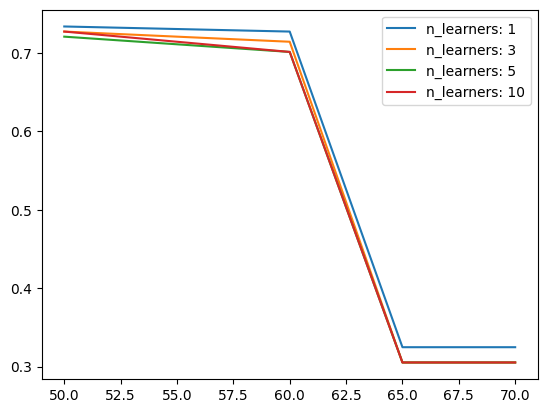

In [13]:
import matplotlib.pyplot as plt

for n_learners in [1, 3, 5, 10]:
    accs = []
    for n_epochs in [50, 60, 65, 70]:
        model = NAMClassifier(
            num_epochs=n_epochs,
            num_learners=n_learners,
            hidden_sizes=[128, 64, 32],
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

        model.fit(X_train, y_train)

        pred = model.predict(X_test).squeeze()
        acc = (pred == y_test).sum() / len(y_test)
        accs.append(acc)

        print(f"n_learners: {n_learners}, n_epochs: {n_epochs}, accuracy: {acc}")

    plt.plot([50, 60, 65, 70], accs, label=f'n_learners: {n_learners}')

plt.legend()
plt.show()

In [40]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=1,
            hidden_sizes=[64, 32],
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

pred = model.predict(X_test).squeeze()

(pred == y_test).sum() / len(y_test)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:02, 16.05it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:02, 16.05it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:02, 16.05it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   4%|▍         | 2/50 [00:00<00:02, 16.05it/s]
                    Training Loss: 1.482 |
Epoch(5):         

0.7337662337662337

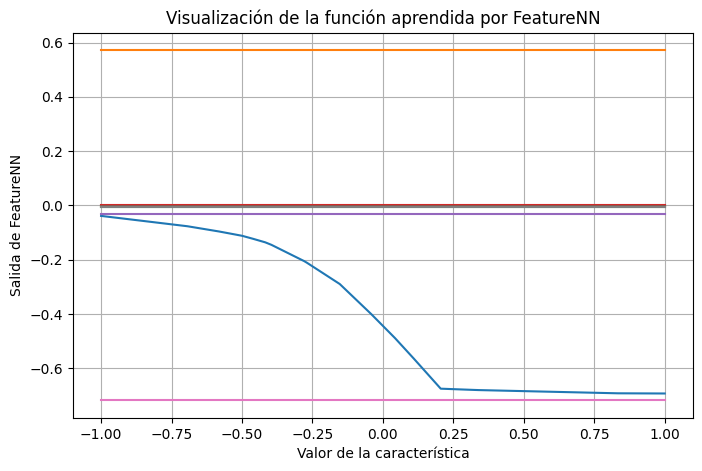

In [44]:
x = model.plot(0)['x']
y = model.plot(0)['y']
conf_int = model.plot(0)['conf_int']    

plt.figure(figsize=(8, 5))
plt.plot(x, y)

plt.xlabel("Valor de la característica")
plt.ylabel("Salida de FeatureNN")
plt.title("Visualización de la función aprendida por FeatureNN")
plt.grid(True)

# Mostrar la gráfica
plt.show()